<a href="https://colab.research.google.com/github/ethane66/MSFT-Talent-AI/blob/main/ejercicio_clase_de_reconocer_numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8761 - loss: 0.4333
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9647 - loss: 0.1219
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9773 - loss: 0.0766
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9831 - loss: 0.0544
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9884 - loss: 0.0405
313/313 - 1s - 3ms/step - accuracy: 0.9766 - loss: 0.0774
Precisión en el conjunto de prueba: 0.9765999913215637
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicción: 7
Etiqueta real: 7


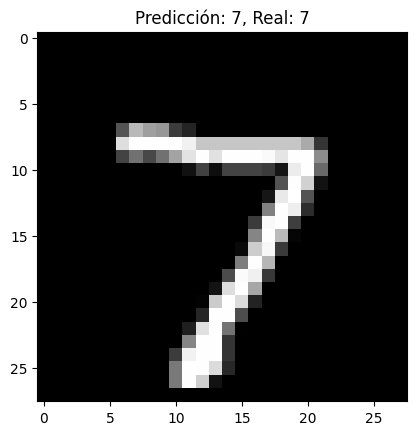

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt




(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0


plt.imshow(x_train[0], cmap='gray')
plt.title(f'Etiqueta: {y_train[0]}')
# plt.show()




model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),         # Aplanar la imagen
    layers.Dense(128, activation='relu'),        # Capa oculta con 128 neuronas
    layers.Dense(10, activation='softmax')       # Capa de salida con 10 neuronas
])
#model.summary()


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5, batch_size=32)


test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Precisión en el conjunto de prueba: {test_acc}')


predicciones = model.predict(x_test)
print(f'Predicción: {np.argmax(predicciones[0])}')
print(f'Etiqueta real: {y_test[0]}')


plt.imshow(x_test[0], cmap='gray')
plt.title(f'Predicción: {np.argmax(predicciones[0])}, Real: {y_test[0]}')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


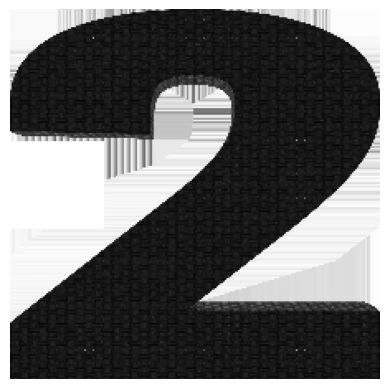

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Predicción: Clase 2


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Montar Google Drive si usas Google Colab
try:
    from google.colab import drive
    drive.mount('/content/drive')
    colab_env = True
except ImportError:
    colab_env = False

# Ruta de la imagen en Google Drive (ajusta la ruta con el nombre de tu archivo)
image_path = "/content/drive/My Drive/numero/dos.png"  # Ajusta la ruta y la extensión

# Cargar y preprocesar la imagen
def load_and_preprocess_image(image_path):
    try:
        img = cv2.imread(image_path)  # Cargar imagen con OpenCV
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
        img = cv2.resize(img, (224, 224))  # Redimensionar a 224x224
        img = img / 255.0  # Normalizar entre 0 y 1
        return np.expand_dims(img, axis=0)  # Añadir dimensión de batch
    except Exception as e:
        print(f"Error al cargar la imagen: {e}")
        return None

# Cargar la imagen procesada
image = load_and_preprocess_image(image_path)

if image is not None:
    # Mostrar la imagen
    plt.imshow(image[0])
    plt.axis('off')
    plt.show()

    # Definir un modelo CNN sencillo
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')  # Salida de 10 clases
    ])

    # Compilar el modelo
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # **IMPORTANTE: Entrenar el modelo aquí**
    # Ejemplo de entrenamiento (necesitas un conjunto de datos):
    # (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    # x_train = np.expand_dims(x_train, -1)
    # x_test = np.expand_dims(x_test, -1)
    # x_train = tf.image.resize(x_train, (224, 224)) / 255.0
    # x_test = tf.image.resize(x_test, (224, 224)) / 255.0
    # model.fit(x_train, y_train, epochs=5)

    # Hacer la predicción con la imagen cargada
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)  # Obtener la clase con mayor probabilidad

    print(f"Predicción: Clase {predicted_class}")
else:
    print("No se pudo cargar la imagen.")

x_train shape: (60000, 28, 28)
x_test shape:  (10000, 28, 28)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.8937 - loss: 0.3529 - val_accuracy: 0.9873 - val_loss: 0.0470
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9837 - loss: 0.0512 - val_accuracy: 0.9863 - val_loss: 0.0428
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9887 - loss: 0.0327 - val_accuracy: 0.9902 - val_loss: 0.0349
Accuracy en test: 98.99%


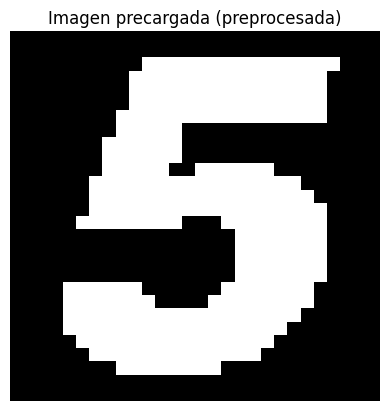

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
El dígito predicho es: 5
Confianza: 77.52%


In [23]:
# ============================================
# 1. IMPORTAR LIBRERÍAS
# ============================================
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import cv2


# ============================================
# 2. DESCARGAR Y CARGAR EL DATASET MNIST DESDE mnist.npz
# ============================================
path = tf.keras.utils.get_file('mnist.npz',
                               'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz')


with np.load(path) as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test  = data['x_test']
    y_test  = data['y_test']


print("x_train shape:", x_train.shape)  # (60000, 28, 28)
print("x_test shape: ", x_test.shape)   # (10000, 28, 28)


# ============================================
# 3. PREPROCESAR LOS DATOS DE ENTRENAMIENTO Y PRUEBA
# ============================================
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0


# Agregar canal (grayscale → 1 canal)
x_train = np.expand_dims(x_train, axis=-1)  # (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis=-1)   # (10000, 28, 28, 1)


# ============================================
# 4. CONSTRUIR Y ENTRENAR UNA CNN SIMPLE
# ============================================
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 dígitos (0-9)
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


# Entrenar (con pocos epochs para ejemplo; en un caso real, aumenta epochs)
epochs = 3
model.fit(x_train, y_train, epochs=epochs, validation_split=0.1)


# Evaluar en test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy en test: {test_acc*100:.2f}%")


# ============================================
# 5. CARGAR Y PREPROCESAR UNA IMAGEN PRECARGADA
# ============================================
# Define la ruta de la imagen precargada (puede ser un archivo local o desde Drive)
image_path = "/content/drive/My Drive/numero/cinco.png"  # Ajusta la ruta según corresponda


def preprocess_custom_image(image_path):
    # Cargar en escala de grises
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"No se pudo cargar la imagen en {image_path}. Verifica la ruta.")

    # Redimensionar a 28x28 (formato MNIST)
    img = cv2.resize(img, (28, 28))

    # Convertir a float32 y normalizar a [0,1]
    img = img.astype("float32") / 255.0

    # Invertir colores si es necesario (MNIST: dígito blanco sobre fondo negro)
    invert = True  # Cambia a False si tu imagen ya tiene el formato correcto
    if invert:
        img = 1.0 - img

    # Ajustar dimensiones: (28,28) → (28,28,1) y agregar dimensión batch → (1,28,28,1)
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    return img


custom_image = preprocess_custom_image(image_path)


# Mostrar la imagen procesada
plt.imshow(custom_image[0].reshape(28, 28), cmap="gray")
plt.title("Imagen precargada (preprocesada)")
plt.axis("off")
plt.show()


# ============================================
# 6. HACER LA PREDICIÓN CON LA IMAGEN PRECARGADA
# ============================================
prediction = model.predict(custom_image)
predicted_digit = np.argmax(prediction)
confidence = np.max(prediction) * 100


print(f"El dígito predicho es: {predicted_digit}")
print(f"Confianza: {confidence:.2f}%")


Construir y entrenar una red neuronal convolucional (CNN) utilizando el dataset MNIST para reconocer dígitos escritos a mano, y posteriormente utilizar el modelo entrenado para predecir el dígito contenido en una imagen precargada desde el sistema local o Google Drive.

Dimensiones de x_train: (60000, 28, 28)
Dimensiones de y_train: (60000,)
Dimensiones de x_test: (10000, 28, 28)
Dimensiones de y_test: (10000,)
Nuevas dimensiones de x_train: (60000, 28, 28, 1)
Nuevas dimensiones de x_test: (10000, 28, 28, 1)
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - accuracy: 0.8969 - loss: 0.3437 - val_accuracy: 0.9855 - val_loss: 0.0519
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9840 - loss: 0.0503 - val_accuracy: 0.9855 - val_loss: 0.0451
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9892 - loss: 0.0342 - val_accuracy: 0.9890 - val_loss: 0.0366
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9923 - loss: 0.0254 - val_accuracy: 0.9907 - val_loss: 0.0335
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9948 - loss: 0.0179 - val_accuracy: 0.9912 - val_loss: 0.0353
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9887 - loss: 0.0346
Precisión en el conjunto de

Saving vecteezy_number-2-nylon-weave-3d-render_16653173.png to vecteezy_number-2-nylon-weave-3d-render_16653173.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


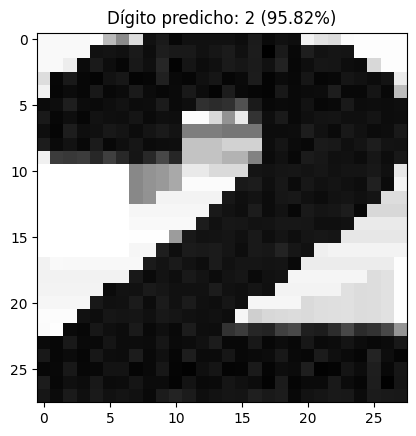

In [25]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files

# Parte 1: Descarga y carga del dataset MNIST
path = tf.keras.utils.get_file(
    'mnist.npz', 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'
)
with np.load(path, allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']
print("Dimensiones de x_train:", x_train.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de x_test:", x_test.shape)
print("Dimensiones de y_test:", y_test.shape)

# Parte 2: Preprocesamiento de los datos
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("Nuevas dimensiones de x_train:", x_train.shape)
print("Nuevas dimensiones de x_test:", x_test.shape)

# Parte 3: Construcción y entrenamiento de la CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Parte 4: Evaluación del modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Precisión en el conjunto de prueba:", test_acc)

# Parte 5: Predicción con una imagen precargada
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
img_array = image.img_to_array(img)
img_array = img_array.astype('float32') / 255
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)
digit = np.argmax(predictions)
confidence = predictions[0][digit] * 100
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.title(f"Dígito predicho: {digit} ({confidence:.2f}%)")
plt.show()